### Objective:
Perform data preprocessing and exploratory data analysis (EDA) to understand trends in Netflix content
#### Questions to Explore:
1. How has the number of Netflix movies and TV shows changed over time?
2. Which countries contribute the most content to Netflix?
3. What are the most common genres?
4. How do ratings vary across movies and TV shows?
5. What is the most common duration of content?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Understanding Dataset

In [4]:
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Missing Values

In [9]:
missing_value = df.isnull().sum()
missing_value

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
percentage_missing = (((df.isnull().sum())/len(df))*100)
percentage_missing

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [11]:
df['director'].unique()

array(['Kirsten Johnson', nan, 'Julien Leclercq', ..., 'Majid Al Ansari',
       'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [12]:
df['director'].fillna('Unknown',inplace=True)

In [13]:
df['cast'].fillna('Unknown', inplace=True)

In [14]:
df['country'].fillna('Unknown', inplace=True)

<AxesSubplot:xlabel='date_added', ylabel='Count'>

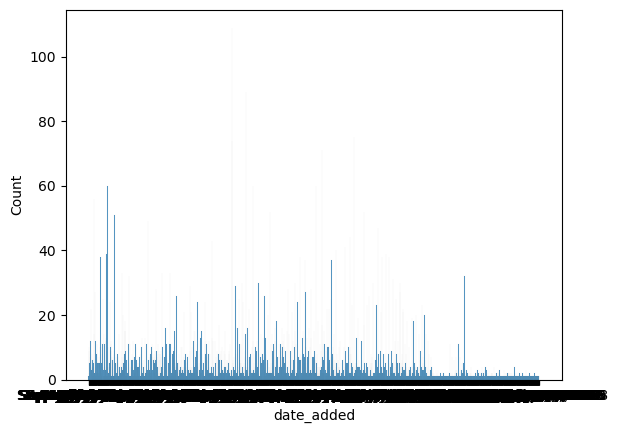

In [15]:
sns.histplot(df['date_added'])

In [16]:
df['date_added'].fillna(df['date_added'].mode()[0],inplace=True)

<AxesSubplot:xlabel='rating', ylabel='Count'>

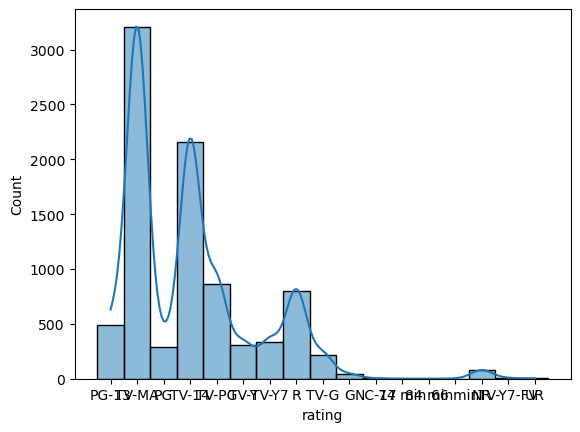

In [17]:
sns.histplot(df['rating'],kde=True)

In [18]:
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

In [19]:
df['duration'].fillna(df['duration'].mode()[0], inplace=True)

#### Final Check

In [20]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Duplicates

In [21]:
df.duplicated().sum()

0

### Outliers

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='release_year'>

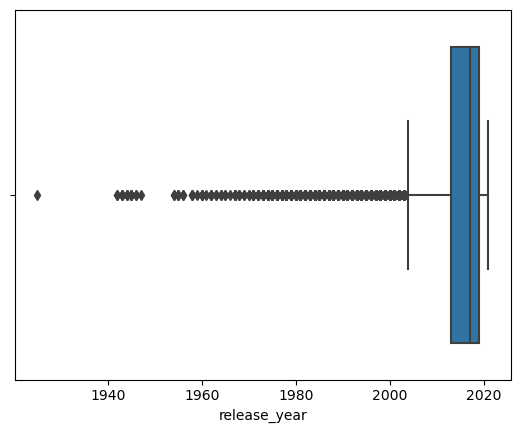

In [22]:
sns.boxplot(df['release_year'])

- They aren't outliers these are the release years

In [23]:
df.type.unique

<bound method Series.unique of 0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
         ...   
8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 8807, dtype: object>

In [24]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [25]:
df['year_added'] = df['date_added'].dt.year

In [26]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added'],
      dtype='object')

In [27]:
content_trend = df.groupby(['type','year_added']).size().unstack()

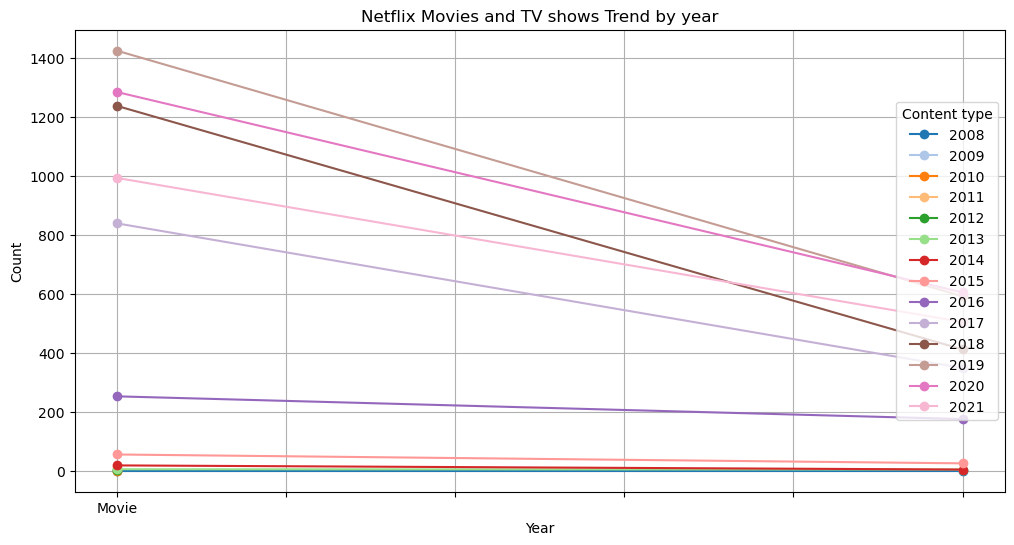

In [28]:
colors = sns.color_palette('tab20', n_colors=len(content_trend.columns))
content_trend.plot(kind='line', marker='o', figsize=(12,6), color=colors)
plt.title('Netflix Movies and TV shows Trend by year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Content type',loc="center right")
plt.grid()
plt.show()

In [29]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


In [36]:
top_countries = df['country'].value_counts().head(10)
top_countries

United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64

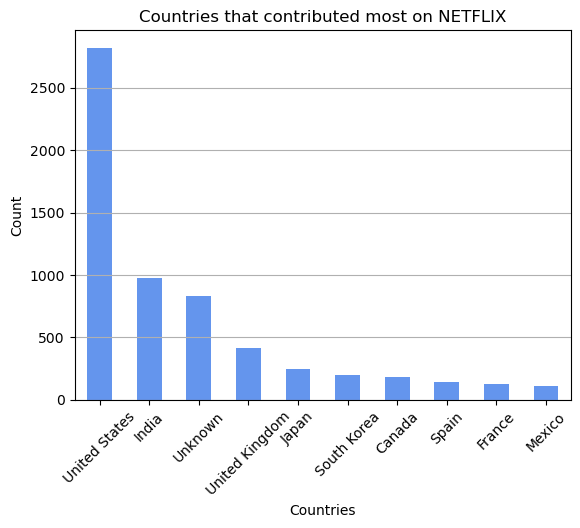

In [37]:
top_countries.plot(kind='bar', color='cornflowerblue')
plt.title('Countries that contributed most on NETFLIX')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

- United Sates contributed most on NETFLIX

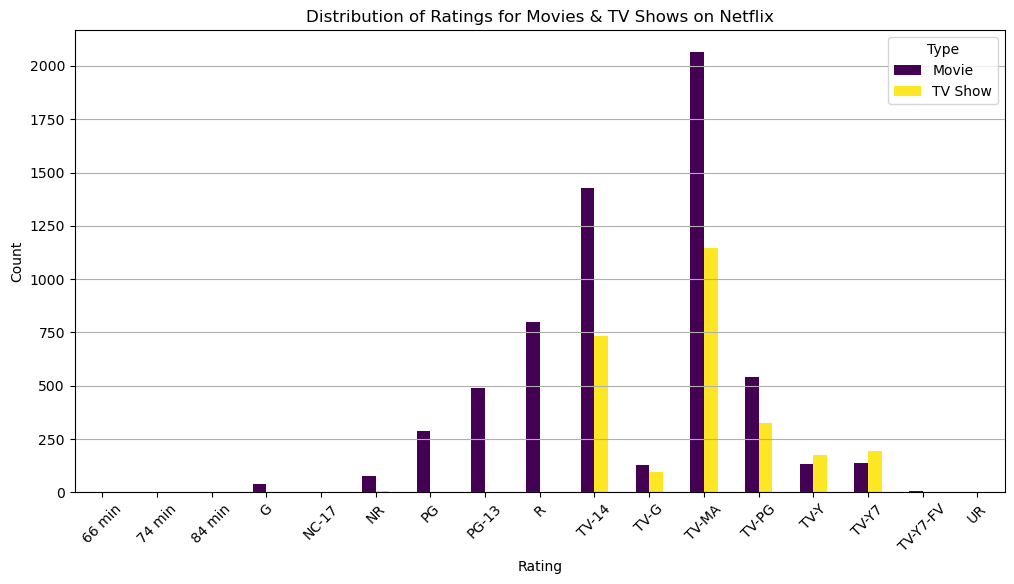

In [49]:
rating_type_counts = df.groupby(["rating", "type"]).size().unstack()

rating_type_counts.plot(kind="bar", figsize=(12,6), colormap="viridis")

plt.title("Distribution of Ratings for Movies & TV Shows on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Type")
plt.grid(axis="y")

plt.show()

In [50]:
top_genres = df["listed_in"].value_counts().head(10)

# Display result
print(top_genres)

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: listed_in, dtype: int64


In [51]:
print(df["duration"].value_counts().head(10))

1 Season     1796
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
97 min        146
93 min        146
91 min        144
95 min        137
96 min        130
Name: duration, dtype: int64


### Key Analysis & Insights:
- Analyzed how the number of Netflix Movies and TV Shows changed over the years.
- Identified countries with the highest number of Netflix content.
- Compared how ratings are distributed between Movies and TV Shows.
- Extracted and ranked the most frequent genres available on Netflix.
- Examined most common duration of content

#### Tools & Techniques Used:
- Data Preprocessing (Handling Missing Values, Outliers, DateTime)
- Exploratory Data Analysis (EDA) (Histograms, Bar Charts, Line Plots)
- Visualization (Matplotlib, Pandas)